# Approximate Rate Examples

In [1]:
import pynucastro as pyna

Let's create a simple network that has both an $(\alpha, \gamma)$ and
$(\alpha, p)(p, \gamma)$ sequence.

In [2]:
reaclib_library = pyna.ReacLibLibrary()

In [3]:
mylib = reaclib_library.linking_nuclei(["mg24", "al27", "si28", "he4", "p"])

In [4]:
rc = pyna.RateCollection(libraries=[mylib])

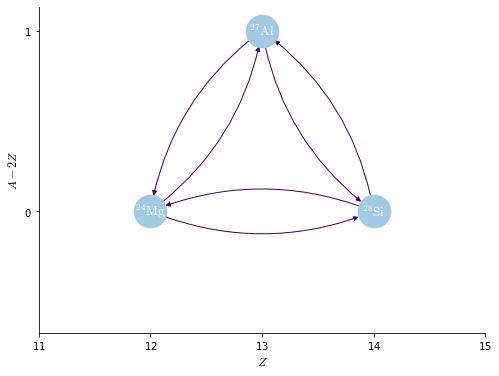

In [5]:
rc.plot(rotated=True, curved_edges=True)

In [6]:
comp = pyna.Composition(rc.get_nuclei())
comp.set_all(1.0)
comp.normalize()

In [7]:
print(comp)

  X(p) : 0.2
  X(he4) : 0.2
  X(mg24) : 0.2
  X(al27) : 0.2
  X(si28) : 0.2



In [8]:
rho = 1.e6
T = 3.e9
ydots = rc.evaluate_ydots(rho, T, comp)

In [9]:
ydots

{p: -218536354.19060785,
 he4: 204282995.84814417,
 mg24: 204282995.84814417,
 al27: -218536354.19060785,
 si28: 14253358.342463665}

## Approximating

In [ ]:
for r in rc.rates:
    print(r.fname)

In [ ]:
print(rc)

In [ ]:
rp = rc.get_rate("he4_mg24__si28")
rs = [rc.get_rate("he4_mg24__p_al27"), rc.get_rate("p_al27__si28")]

In [ ]:
rs

In [ ]:
rp_reverse = rc.get_rate("si28__he4_mg24")
rs_reverse = [rc.get_rate("si28__p_al27"), rc.get_rate("p_al27__he4_mg24")]

In [ ]:
ar = pyna.ApproximateRate(primary_rate=rp, secondary_rates=rs,
                          primary_inverse=rp_reverse, secondary_inverse=rs_reverse)